In [39]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import warnings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100

In [40]:
data = pd.read_csv('movie_metadata.csv')

In [41]:
cols = data.columns[((data.dtypes.values == np.dtype('float64')) | (data.dtypes.values == np.dtype('int64')))]
# cols = data.columns

In [42]:
imputer = IterativeImputer(random_state=100, n_nearest_features=5)
imp_train_data = data[cols]
full_completed_data = pd.DataFrame(imputer.fit_transform(imp_train_data), columns=cols)

In [43]:
data = data.fillna(full_completed_data)

In [44]:
df = data

In [45]:
number_of_movies = {}
for genres in df.genres:
    for genre in genres.split('|'):
        if genre in number_of_movies:
            number_of_movies[genre] += 1
        else:
            number_of_movies[genre] = 0

genres = []
for genre in number_of_movies:
    if number_of_movies[genre] > 400:
        genres.append(genre)

print(*genres, sep=', ')

Action, Adventure, Fantasy, Sci-Fi, Thriller, Romance, Comedy, Family, Mystery, Drama, Crime, Horror


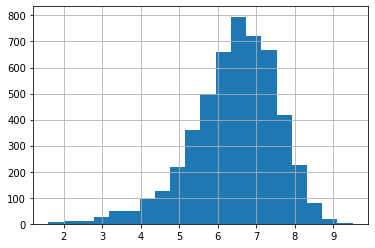

In [46]:
df['imdb_score'].hist(bins=20);

In [47]:
genres_df = pd.DataFrame(columns=['genre', 'mean', 'std', 'D', 'p-value'])
i = 0
for genre in genres:
    data = df[df['genres'].str.contains(genre)]
    
    a = data['imdb_score'].mean()
    sigma = data['imdb_score'].std()
    
    cdf = stats.norm(loc=a, scale=sigma).cdf
    kstest = stats.kstest(rvs=data['imdb_score'], cdf=cdf, alternative='greater')
    genres_df.loc[i] = [genre, a, sigma, *kstest]
    i += 1
    
genres_df.sort_values(by=['mean'], ascending=False)

,genre,mean,std,D,p-value
9,Drama,6.763763,0.957354,0.035518,0.001402
10,Crime,6.564792,1.026456,0.027802,0.248391
8,Mystery,6.486400,1.090759,0.032237,0.346285
5,Romance,6.450587,0.996035,0.038059,0.039448
1,Adventure,6.441170,1.131196,0.026844,0.259754
4,Thriller,6.314245,1.054334,0.023237,0.214541
2,Fantasy,6.307049,1.160686,0.028683,0.359632
3,Sci-Fi,6.281818,1.210816,0.028123,0.370490
7,Family,6.245055,1.201598,0.028225,0.411259
0,Action,6.239896,1.118835,0.033225,0.076695
